# This jupyter notebook is prepared by “Daniel Cisneros”.

## **1. Load Data and perform basic EDA**

### **I.** import libraries necessary libraries and perform necessariy nltk download operations

In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
import nltk   
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import string

In [84]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **II.** As part of understanding how the columns are separated, read the file using the open function and create a list and show the first 10 items in the list

In [85]:
messages = [line.rstrip() for line in open('news.csv')]
print(len(messages))
#See some messages
for message in messages[:11]:
    print(message)
    print('\n')

44955
title	text	subject	date	target


As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats al

### **III.** Based on your observation on how the data are separated, load the data set into pandas data frame and show the first 5 and last 5 rows

In [86]:
data=  pd.read_csv('news.csv', sep = '\t', names = ['title', 'text', 'subject', 'date', 'target' ])
data = data.iloc[1: , :]
data.head()

,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [87]:
data.tail()

,title,text,subject,date,target
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44898,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


### **IV.** See whether there are any null values and remove all the rows with any null values, and then show again that there are no more null values

In [88]:
nulls = data.isnull().sum().to_frame("nulls")
nulls

,nulls
title,0
text,0
subject,0
date,0
target,0


### **V.** Generate a counterplot to show the number of news in each subject

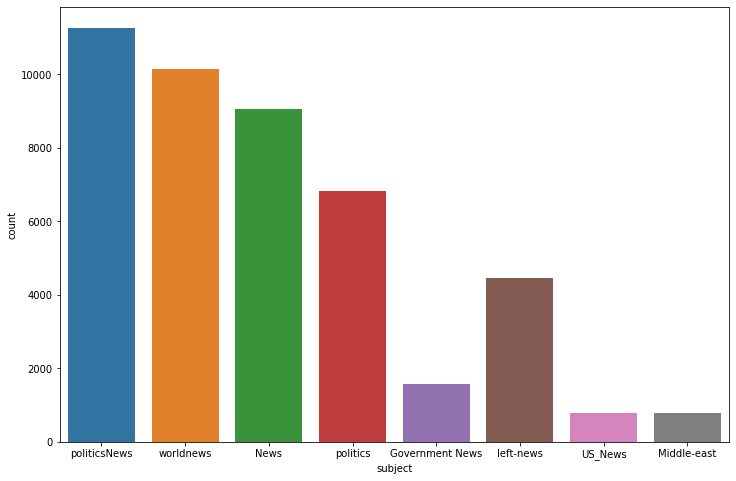

In [89]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'subject', data = data)

### **VI.** Generate a counterplot to show the number of news in each category (fake/ True)

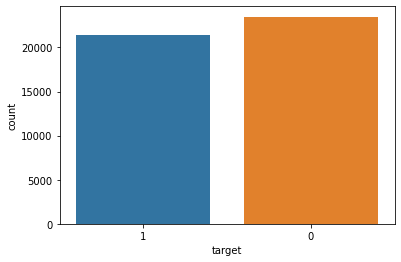

In [90]:
sns.countplot(x = "target", data=data)

### **VII.** Generate two word clouds, one for fake news and one for true news, and observe the most frequent words in each category and just write your observation on them.


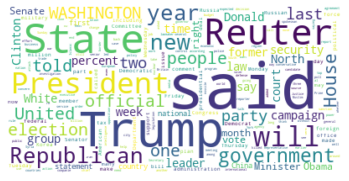

In [91]:
true_news = data.loc[data['target'] == '1', 'text']
text = " ".join(cat for cat in true_news)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

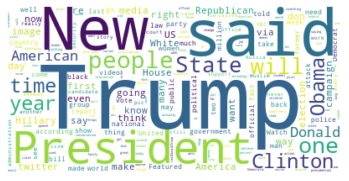

In [92]:
fake_news = data.loc[data['target'] == '0', 'text']
text = " ".join(cat for cat in fake_news)
#text2 = " ".join(title for title in data.target)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Most of these news are about one of the ex-president of the United States of America containing "Trump", "said" all over. Some other words appear in the fake and true news, understanding of why people can be easily full of fake a real news confusing them who is right. 

### **VIII.** Create a column "AllText" that has the concatenated subject, title, and text [For example, for each news we have the subject, title, and text. We want a column that has all of this together as a large string]  [See the example answer with the majority vote in this link: https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra (Links to an external site.) )

In [93]:
cols = ['subject' , 'title', 'text']
data['AllText'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data.head()

,title,text,subject,date,target,AllText
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"politicsNews_As U.S. budget fight looms, Repub..."
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,politicsNews_U.S. military to accept transgend...
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,politicsNews_Senior U.S. Republican senator: '...
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,politicsNews_FBI Russia probe helped by Austra...
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,politicsNews_Trump wants Postal Service to cha...


### **IX.** Using the dataframe's copy function, save the data frame into another dataframe so that you can use it later

In [94]:
copy_data= data.copy()
copy_data.head()

,title,text,subject,date,target,AllText
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"politicsNews_As U.S. budget fight looms, Repub..."
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,politicsNews_U.S. military to accept transgend...
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,politicsNews_Senior U.S. Republican senator: '...
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,politicsNews_FBI Russia probe helped by Austra...
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,politicsNews_Trump wants Postal Service to cha...


### **X.** Drop the title, text, subject, and date columns from the data frame as we will not use them separately. We have all the text in a single column that you have generated above

In [95]:
data = data.drop(['title', 'text', 'subject', 'date'], axis = 1)
data

,target,AllText
1,1,"politicsNews_As U.S. budget fight looms, Repub..."
2,1,politicsNews_U.S. military to accept transgend...
3,1,politicsNews_Senior U.S. Republican senator: '...
4,1,politicsNews_FBI Russia probe helped by Austra...
5,1,politicsNews_Trump wants Postal Service to cha...
...,...,...
44894,0,Middle-east_McPain: John McCain Furious That I...
44895,0,Middle-east_JUSTICE? Yahoo Settles E-mail Priv...
44896,0,Middle-east_Sunnistan: US and Allied ‘Safe Zon...
44897,0,Middle-east_How to Blow $700 Million: Al Jazee...


### **XI.** Calculate the length of each text (I mean AllText column) and put them in a length column

In [96]:
data['length'] = data['AllText'].apply(len)
data

,target,AllText,length
1,1,"politicsNews_As U.S. budget fight looms, Repub...",4737
2,1,politicsNews_U.S. military to accept transgend...,4155
3,1,politicsNews_Senior U.S. Republican senator: '...,2863
4,1,politicsNews_FBI Russia probe helped by Austra...,2534
5,1,politicsNews_Trump wants Postal Service to cha...,5287
...,...,...,...
44894,0,Middle-east_McPain: John McCain Furious That I...,3311
44895,0,Middle-east_JUSTICE? Yahoo Settles E-mail Priv...,1778
44896,0,Middle-east_Sunnistan: US and Allied ‘Safe Zon...,25163
44897,0,Middle-east_How to Blow $700 Million: Al Jazee...,2765


### **XII.** Plot two histograms to see the distribution of the lengths. One for fake news and one for true news. Write in words about the plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f316f0512d0>,
      dtype=object)

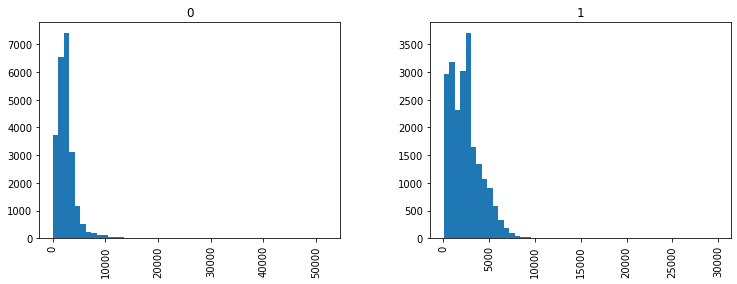

In [97]:
data.hist(column='length', by='target', bins=50,figsize=(12,4))

##### We can see there more fake news with a longer longer lenght. Meaning there could be a correlation between fake news being longer and true news being shorter. 

### **XIII.** Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?

###### Ter Frecuency-Inverse Document Frecuency (TFIDF) is used to give measure to a word that indicates how important the word based on the use of that word in all the documents. There is a function in sklearn named CountVectorizer() which is used to fit the bag-or-words model. We can call this function then fit_transform the model with the bag of words then print the features name and vocabulary and finally putting it into an array with toarray() method. 

##**2. Train Test Split**

### **I.** Import related libraries and perform train test split. Keep 20% data in the test set

In [98]:
from sklearn.model_selection import train_test_split 

X = data['AllText']
Y = data['target']

msg_train, msg_test, label_train, label_test = train_test_split(X,Y,test_size=.20)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### **II.** Using a count plot show how many real and fake news do we have in the training set and how many in the test set


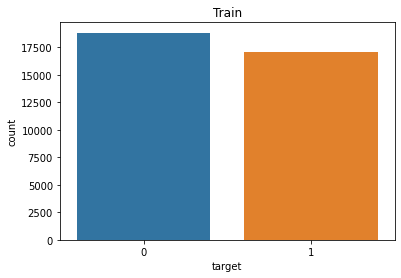

In [99]:
sns.countplot(x = label_train, data = msg_train)
plt.title("Train")
plt.show()


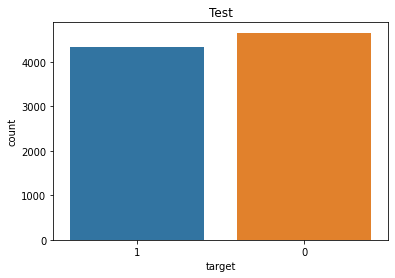

In [100]:
sns.countplot(x = label_test, data = msg_test)
plt.title("Test")
plt.show()

## **3. Training and Testing Fake news classifier using MultinomialNB**

### **I.** Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier

In [101]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
stopwordList = stopwords.words('english')

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

   

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

In [102]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


### **II.** Fit the pipeline and then perform prediction

In [103]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f316f2a9f80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### **III.** Generate classification report and confusion matrix (you have to achieve at least 96% accuracy for the test set to receive full credit)

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = pipeline.predict(msg_test)

print(confusion_matrix(label_test, predictions))
print(classification_report(predictions,label_test))

[[4448  205]
 [ 184 4143]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4632
           1       0.96      0.95      0.96      4348

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



### **IV.** Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.

##### **Discussion:** The model contains a high value of true negative[4448] and true positives[4143] values meaning that is prediting the majority of the negative class. For the classification report we can see a high accuracy of 96% which is very accurate but still not perfect, followed by a good precision, recall and f1-score.

### **V.** Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. 

##### from following link: https://www.foxnews.com/media/biden-official-says-food-shortages-will-push-farmers-green-energy-never-let-crisis-go-waste

In [106]:
fake_true_news = "Biden official says food shortages will push farmers to green energy: 'Never let a crisis go to waste'"

pipeline.predict([fake_true_news])

array(['1'], dtype='<U1')

###### From data file section 

In [107]:
fake_true_news2 = "The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage & Russia hoax! [0746 EST] - Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE! [0804 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR)"
pipeline.predict([fake_true_news2])

array(['0'], dtype='<U1')

## 4. Training and Testing a Deep Neural Network

### **I.** Import related library for using MLPClassifier from sklearn neural netowrk.

In [108]:
from sklearn.neural_network import MLPClassifier

### **II.** Create a pipeline like 3i, for MLPClassfier you should use at least two layers and also should verbose = 2 (you can use other parameters as you wish or use the one you see from the uploaded google colab)

In [109]:
pipeline_classifier = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

### **III.** Fit the pipeline and then perform prediction

In [111]:
pipeline_classifier.fit(msg_train,label_train)

Iteration 1, loss = 0.34480533
Validation score: 0.988586
Iteration 2, loss = 0.16604127
Validation score: 0.991370
Iteration 3, loss = 0.13395498
Validation score: 0.990813
Iteration 4, loss = 0.11542579
Validation score: 0.989421
Iteration 5, loss = 0.10134635
Validation score: 0.989699
Iteration 6, loss = 0.08976327
Validation score: 0.989978
Iteration 7, loss = 0.08001944
Validation score: 0.990256
Iteration 8, loss = 0.07167555
Validation score: 0.989978
Iteration 9, loss = 0.06447833
Validation score: 0.991370
Iteration 10, loss = 0.05822420
Validation score: 0.991370
Iteration 11, loss = 0.05275052
Validation score: 0.991091
Iteration 12, loss = 0.04793492
Validation score: 0.992483
Iteration 13, loss = 0.04367250
Validation score: 0.992762
Iteration 14, loss = 0.03988842
Validation score: 0.993040
Iteration 15, loss = 0.03650768
Validation score: 0.992483
Iteration 16, loss = 0.03348471
Validation score: 0.993318
Iteration 17, loss = 0.03076925
Validation score: 0.993597
Iterat

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f316f2a9f80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [112]:
predictions_class = pipeline_classifier.predict(msg_test)

### **IV.** Generate classification report and confusion matrix (You have to achieve at least 99% accuracy to receive full credit for this model)

In [113]:
print(confusion_matrix(label_test, predictions_class))
print(classification_report(predictions_class,label_test))

[[4635   18]
 [  13 4314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4648
           1       1.00      1.00      1.00      4332

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### **V.**  Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.

##### The performance of this model was more accurate than the previous one containing a 1.00 or 100% accuracy. The values for false positive are low compared to the previoues model. The values true negatives[4635] and true positives[4314] are higher than the previous model too. Therefore this model performs better.

### **VI.** Use the same news you have used above and then use the model to predict whether is it true or not. 

In [116]:
fake_true_news = "Biden official says food shortages will push farmers to green energy: 'Never let a crisis go to waste'"

pipeline_classifier.predict([fake_true_news])

array(['0'], dtype='<U1')

In [117]:
fake_true_news2 = "The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage & Russia hoax! [0746 EST] - Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE! [0804 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR)"
pipeline_classifier.predict([fake_true_news2])

array(['1'], dtype='<U1')

### **VII.** Discuss any difference in performance between this model and NB model

##### **Discussion:** This model performs better, using deep neural network even though is more time consuming the results are better and if we want to build a perfect model my suggestion will be using deep neural network. For a less accurate model NB works well too with less time and computation.  